# Garimpagem de Dados

## Aula 4 - Exercídio de Classificação com kNN

13/10/2017

**Dataset:** Titanic: Machine Learning from Disaster

https://www.kaggle.com/c/titanic/data

Partindo da aula passada:

1. Atualizar a função que mede a distância euclidiana para o pacote do scikit-learn 

2. Implementar uma função que selecione os k vizinhos mais próximos (k > 1)

3. Implementar uma função que recebe os k vizinhos mais próximos e determinar a classe correta

4. Transformar as features categoricas em numéricas (tip: pandas ou scikit-learn)

5. Analisar a necessidade de normalizar as features numéricas (tip: pandas ou scikit-learn)

6. Selecionar as features baseada na correlação (tip: pandas)

7. Separar o dataset em treino (75%) / teste (25%) / validação (10% do treino)

4. Execute o classificador para 30 k's pulando de 4 em 4 e apresente todas as acurácias utilizando o dataset de validação (Qual o melhor k?) [plotar um gráfico com os resultados]

5. Executar o classificador para o melhor k encontrado utilizando o dataset de teste e apresentar um relatório da precisão (tip: scikit-learn) [plotar um gráfico com os resultados]

In [1]:
# Importando as bibliotecas
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class KNNClassifier(object):
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.dist = DistanceMetric.get_metric("euclidean")

    def euc_distance(self,row, point):
        return self.dist.pairwise([row], [point])[0,0]
        
    def closest(self, row, K):
        """
        Retorna a classe respondente ao ponto mais próximo do dataset de treino.\
        É um exemplo de implementação do kNN com k=1.
        """
        allDist = [self.euc_distance(row, points) for points in self.X_train]
        closests = np.argsort(allDist)[:K]
        return self.y_train[closests]

    def fit(self, training_data, training_labels):
        self.X_train = training_data
        self.y_train = training_labels

    def predict(self, to_classify, K):
        predictions = []
        for row in to_classify:
            labels = np.argmax(np.bincount(self.closest(row, K)))
            predictions.append(labels)
        return predictions

In [3]:
# Carregando os dados
data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Inputando dados faltosos em Idade, usando a média
data_train["Age"] = data_train.Age.fillna(data_train.Age.mean())

# Remove linhas com dados faltosos (falta de informação e impossibilidade de inputação)
data_train = data_train.dropna(axis=0, how="any")

# Remove os atributos "Name" e "Ticket" pois, de forma crua, eles provavelmente
# não oferecem informações que permitam inferir se a pessoa sobreviveu ou não
data_train.drop(labels=["Name", "Ticket"], axis=1, inplace=True)

# Separando entradas/saída 
X_train = data_train.loc[:,"Pclass":]
y_train = data_train[["Survived"]]

In [5]:
# Transformando dados categoricos
LE = LabelEncoder()
for feature in ["Sex", "Cabin", "Embarked"]:
    X_train[[feature]] = X_train[[feature]].astype(str)
    LE.fit(X_train.loc[:,feature])
    X_train[[feature]] = LE.transform(X_train.loc[:,feature])
    
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,0,38.0,1,0,71.2833,80,0
3,1,0,35.0,1,0,53.1000,54,2
6,1,1,54.0,0,0,51.8625,128,2
10,3,0,4.0,1,1,16.7000,144,2
11,1,0,58.0,0,0,26.5500,48,2


In [6]:
# Verificando a Matriz de Correlação (Numérica)
corrMatrix = X_train.corr()
corrMatrix

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Pclass,1.000000,-0.060014,-0.287184,-0.086972,0.056288,-0.311740,0.494000,0.170303
Sex,-0.060014,1.000000,0.167361,-0.152552,-0.110574,-0.137185,-0.083768,0.096805
Age,-0.287184,0.167361,1.000000,-0.139881,-0.246928,-0.076680,-0.125576,-0.090462
SibSp,-0.086972,-0.152552,-0.139881,1.000000,0.262348,0.291777,0.056745,0.002228
Parch,0.056288,-0.110574,-0.246928,0.262348,1.000000,0.384970,0.001291,0.061455
Fare,-0.311740,-0.137185,-0.076680,0.291777,0.384970,1.000000,-0.262818,-0.239213
Cabin,0.494000,-0.083768,-0.125576,0.056745,0.001291,-0.262818,1.000000,0.231418
Embarked,0.170303,0.096805,-0.090462,0.002228,0.061455,-0.239213,0.231418,1.000000


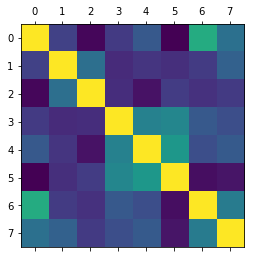

In [7]:
# Verificando a Matriz de Correlação (Plotagem)
plt.matshow(corrMatrix.values)
plt.show()

# Removeremos o atributo "Cabin", apesar de a correlação não ser realmente muito forte
data_train.drop(labels=["Cabin"], axis=1, inplace=True)

In [8]:
# Normalizando as features numéricas
X_train = MinMaxScaler().fit_transform(X_train)

np.disp(X_train)

[[ 0.          0.          0.46889226 ...,  0.13913574  0.55172414  0.        ]
 [ 0.          0.          0.43095599 ...,  0.1036443   0.37241379  1.        ]
 [ 0.          1.          0.67121902 ...,  0.10122886  0.88275862  1.        ]
 ..., 
 [ 0.          0.          0.69650986 ...,  0.16231419  0.47586207  0.        ]
 [ 0.          0.          0.22862924 ...,  0.0585561   0.2         1.        ]
 [ 0.          1.          0.31714719 ...,  0.0585561   0.40689655  0.        ]]


In [9]:
# Separação dos Datasets
# Treino(75%) / Teste(25%)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train.values.flatten(), test_size=0.25)

# Optimal number of neighbors:  55
# Score:  93.75 %


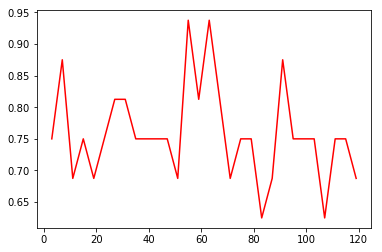

In [10]:
# Cross-Validation
knn = KNNClassifier()
knn.fit(X_train, y_train)

score_cv = []
k_cv = np.arange(3, 123, 4)  # O K=1 foi removido pois estava causando over-fitting

for k in k_cv:
    _, X_cv, _, Y_cv = train_test_split(X_train, y_train, test_size=0.1)
    y_pred_cv = knn.predict(X_cv, k) 
    score_cv.append(accuracy_score(y_pred=y_pred_cv, y_true=Y_cv))
    
optK = k_cv[np.argmax(score_cv)]
print("# Optimal number of neighbors: ", optK)
print("# Score: ", np.max(score_cv)*100, "%")
    
plt.figure()
plt.plot(k_cv, score_cv, 'r-')
plt.show()

In [11]:
# Testando o K ótimo
y_pred = knn.predict(X_test, optK)
print(classification_report(y_test, y_pred, target_names=["Survived", "Not Survived"]))

              precision    recall  f1-score   support

    Survived       0.68      0.75      0.71        20
Not Survived       0.83      0.77      0.80        31

 avg / total       0.77      0.76      0.77        51

